# Project Heart

## 1 Goals

1. Build a black box that inputs all the features and predicts whether or not the patient will have heart trouble ("output"). 

2. Show some plots that have histograms of various features

3. Correlations between features.

## 2 File Information

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

In [95]:
file='heart.csv'
heart = pd.read_csv(file)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [96]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [97]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Features (Some Need Revision)

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The "output" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 1.

## 3 Histograms of Features

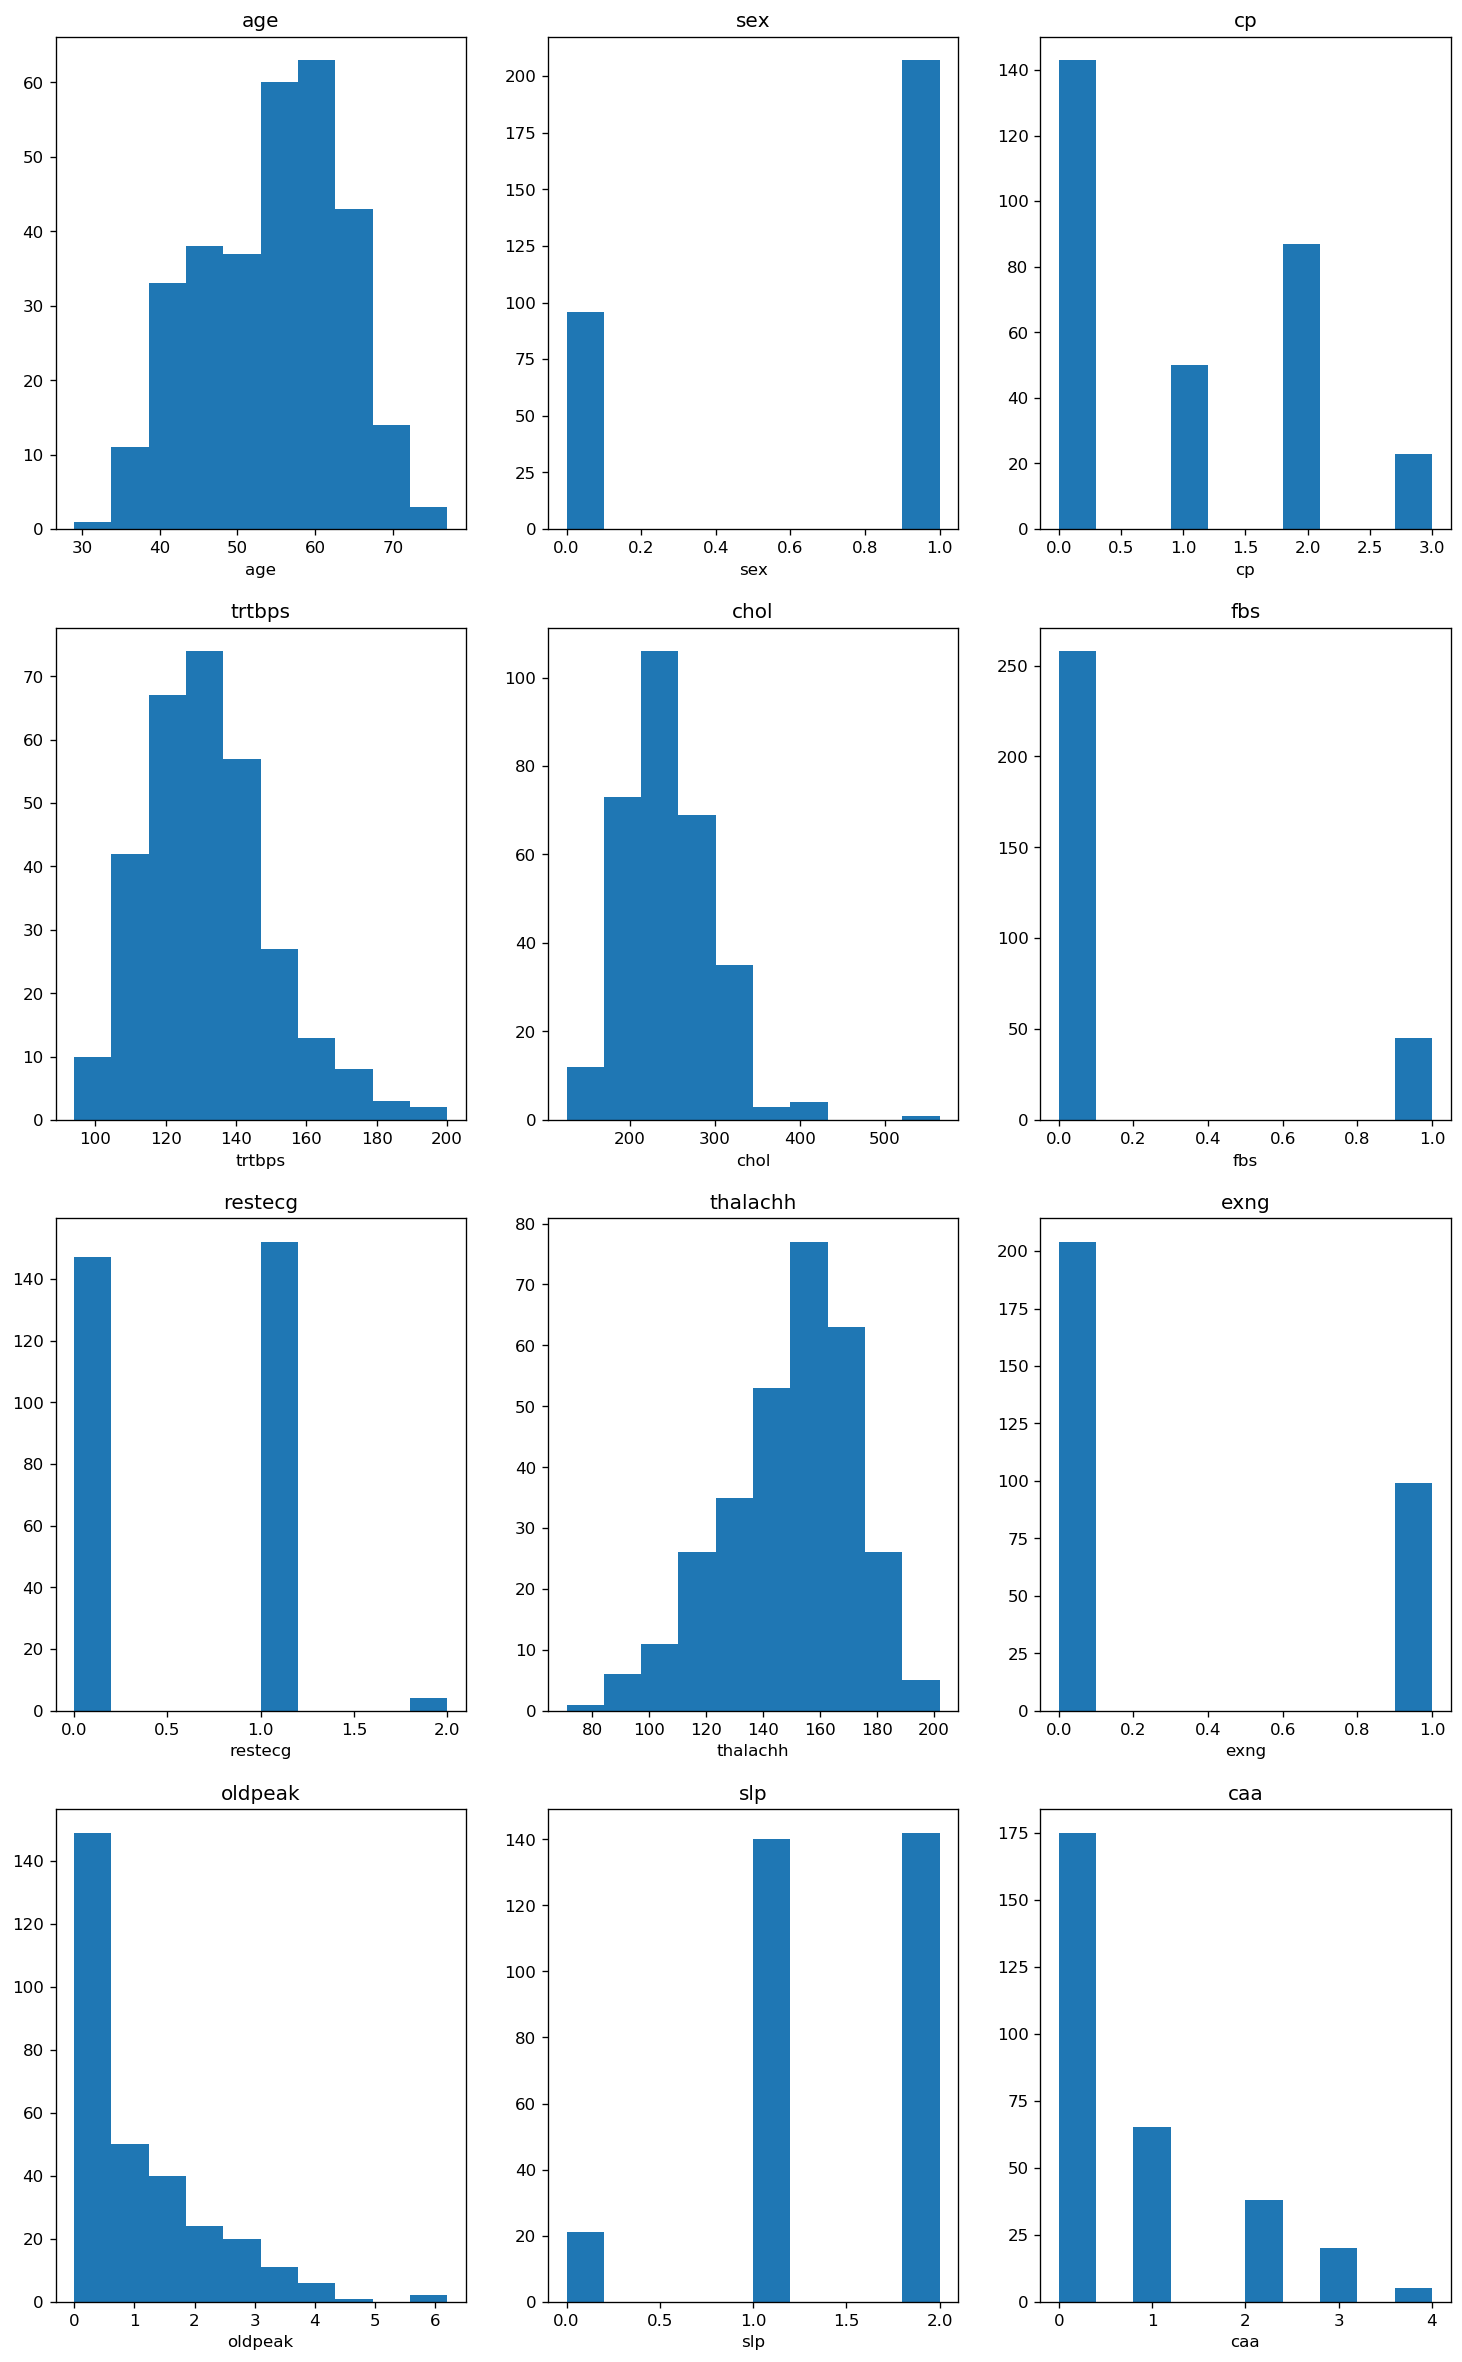

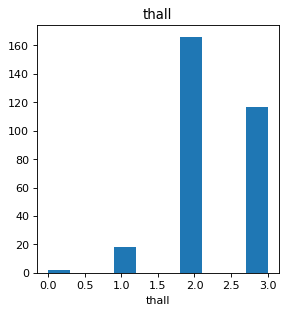

In [98]:
features = ["age","sex","cp", "trtbps", "chol", "fbs", 
               "restecg", "thalachh", "exng",
               "oldpeak", "slp", "caa", "thall"]
nrow, ncol = 4, 3
fig, axs = plt.subplots(nrow, ncol, figsize=(15,25), dpi = 120)
for i in range(nrow):
    for j in range(ncol):
        feat = np.array(heart[features[i*ncol+j]])
        axs[i][j].hist(feat,bins=10)
        axs[i][j].title.set_text(features[i*ncol+j])
        axs[i][j].set_xlabel(features[i*ncol+j])
plt.figure(figsize=(3.9,4.1), dpi=80)
feat = np.array(heart['thall'])
plt.hist(feat,bins=10)
plt.title('thall')
plt.xlabel('thall')
plt.show()

## 4 Training and Testing

### 4.1 Prepare Training and Test Set

In [99]:
# We tried the following types of classification algorithms:
# LogisticRegression, GaussianNB, SVC, KNeighborsClassifier, DecisionTreeClassifier
# LogisticRegression has the best performance 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

'''
X = np.array(heart.drop(['output'],axis=1))
y = np.array(heart['output'])
'''
X = heart.drop(['output'],axis=1)
y = heart['output']

trainsizefrac = 0.8
trainsize = int(len(X)*trainsizefrac)
testsize = int(len(X)-len(X)*trainsizefrac)

randomstate = 137

# Randomize and split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = trainsizefrac, random_state = randomstate)

print('Training set fraction =', trainsizefrac)
print("Train size =", trainsize)
print('Test size =', testsize)

Training set fraction = 0.8
Train size = 242
Test size = 60


### 4.2 Selecting the Solver for the Classifier

In [100]:
clf = LogisticRegression()
for sol in ['newton-cg', 'sag', 'saga', 'lbfgs', 'liblinear']:
    clf = LogisticRegression(solver = sol, max_iter=7500)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print("Method:", sol+", Score:", accuracy)

Method: newton-cg, Score: 0.8688524590163934
Method: sag, Score: 0.8852459016393442
Method: saga, Score: 0.8688524590163934
Method: lbfgs, Score: 0.8688524590163934
Method: liblinear, Score: 0.8688524590163934


Across multiple choices of the training set, the solver "liblinear" has better performance in most cases. Also, it generally works well for small sample size (from online sources).

### 4.3 Train the Classifier

In [101]:
clf = LogisticRegression(solver = 'liblinear', max_iter=7500)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Score:", accuracy)

Score: 0.8688524590163934


# --------------------------------------------------------------------------------------

## 5 All Possible Combinations of the Features
#### ["age","sex","cp", "trtbps", "chol", "fbs",   "restecg", "thalachh", "exng", "oldpeak", "slp", "caa", "thall"]

### 5.1 Find All Subsets of Features
Sourcecode: https://stackoverflow.com/questions/1482308/how-to-get-all-subsets-of-a-set-powerset

In [102]:
def list_powerset(lst):
    # the power set of the empty set has one element, the empty set
    result = [[]]
    for x in lst:
        # for every additional element in our set
        # the power set consists of the subsets that don't
        # contain this element (just take the previous power set)
        # plus the subsets that do contain the element (use list
        # comprehension to add [x] onto everything in the
        # previous power set)
        result.extend([subset + [x] for subset in result])
    return result

combf = list_powerset(["age","sex","cp", "trtbps", "chol", "fbs",
                             "restecg", "thalachh", "exng", "oldpeak", "slp", "caa", "thall"])[:-1]

### 5.2 Find All Subsets of Features

In [103]:
scores = []
trainsize = int(0.8*303)
print("train size:", int(trainsize), "test size:", 303-int(trainsize))
for comb in combf:
    
    clf = LogisticRegression(solver = 'liblinear', max_iter = 150)
    
    X = np.array(heart.drop(['output'] + comb,axis=1))
    y = np.array(heart['output'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = trainsize, random_state = 137)

    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    scores.append(score)
maxscore = max(scores)
print(maxscore)

train size: 242 test size: 61
0.9180327868852459


In [104]:
indices = [i for i, x in enumerate(scores) if x == maxscore]

print(len(indices), "combinations of features have the best scores: ")

bestcombf = []
for ind in indices:
    bestcombf.append(combf[ind])

for eachline in bestcombf:
    print(eachline)

counts = [0]*13
for i in range(13):
    feature = features[i]
    for f in bestcombf:
        if feature in f:
            counts[i] += 1
#print(counts)

11 combinations of features have the best scores: 
['exng', 'oldpeak', 'slp']
['age', 'exng', 'oldpeak', 'slp']
['cp', 'trtbps', 'exng', 'oldpeak', 'slp']
['age', 'cp', 'trtbps', 'exng', 'oldpeak', 'slp']
['age', 'sex', 'cp', 'trtbps', 'chol', 'exng', 'oldpeak', 'slp']
['fbs', 'exng', 'oldpeak', 'slp']
['cp', 'trtbps', 'fbs', 'exng', 'oldpeak', 'slp']
['age', 'cp', 'trtbps', 'fbs', 'exng', 'oldpeak', 'slp']
['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'exng', 'oldpeak', 'slp']
['sex', 'cp', 'restecg', 'exng', 'oldpeak', 'slp']
['sex', 'cp', 'fbs', 'restecg', 'exng', 'oldpeak', 'slp']


## 6 Correlations

### 6.1 Correlations between Continuous Variables

In [105]:
X = heart.drop(["sex","cp", "fbs", "restecg", "exng", "slp", "caa", "thall",'output'],axis=1)
y = heart['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 137)

In [106]:
corrP = X_train.corr(method ='pearson')
print("Pearson method: \n", corrP)
corrK = X_train.corr(method ='kendall')
print("\n\nKendall method: \n", corrK)
corrS = X_train.corr(method ='spearman')
print("\n\nSpearman method: \n", corrS)

Pearson method: 
                age    trtbps      chol  thalachh   oldpeak
age       1.000000  0.257463  0.237468 -0.393936  0.198642
trtbps    0.257463  1.000000  0.162377 -0.012969  0.201888
chol      0.237468  0.162377  1.000000 -0.046850  0.086269
thalachh -0.393936 -0.012969 -0.046850  1.000000 -0.322760
oldpeak   0.198642  0.201888  0.086269 -0.322760  1.000000


Kendall method: 
                age    trtbps      chol  thalachh   oldpeak
age       1.000000  0.181492  0.156926 -0.267010  0.186453
trtbps    0.181492  1.000000  0.098777  0.009633  0.115168
chol      0.156926  0.098777  1.000000 -0.048503  0.048346
thalachh -0.267010  0.009633 -0.048503  1.000000 -0.286392
oldpeak   0.186453  0.115168  0.048346 -0.286392  1.000000


Spearman method: 
                age    trtbps      chol  thalachh   oldpeak
age       1.000000  0.256562  0.227500 -0.378522  0.260404
trtbps    0.256562  1.000000  0.143611  0.013983  0.160958
chol      0.227500  0.143611  1.000000 -0.071976  0.0619

In [107]:
tempcorrP = np.array(corrP)
tempcorrP = np.abs(tempcorrP)
for i in range(len(tempcorrP)):
    tempcorrP[i][i] -= 1
maxcorrP = np.amax(tempcorrP)
maxpos = np.where(tempcorrP == maxcorrP)
maxcorrP = np.array(corrP)[maxpos[0][0]][maxpos[0][1]]
print("Maximum Correlation using Pearson Method: Corr(" + corrP.columns[maxpos[0][0]]+","+corrP.columns[maxpos[0][1]]+") = ", maxcorrP)

Maximum Correlation using Pearson Method: Corr(age,thalachh) =  -0.3939361729822804


In [108]:
tempcorrK = np.array(corrK)
tempcorrK = np.abs(tempcorrK)
for i in range(len(tempcorrK)):
    tempcorrK[i][i] -= 1
maxcorrK = np.amax(tempcorrK)
maxpos = np.where(tempcorrK == maxcorrK)
maxcorrK = np.array(corrK)[maxpos[0][0]][maxpos[0][1]]
print("Maximum Correlation using Kendal Method: Corr(" + corrK.columns[maxpos[0][0]]+","+corrK.columns[maxpos[0][1]]+") = ", maxcorrK)

Maximum Correlation using Kendal Method: Corr(thalachh,oldpeak) =  -0.28639210484788125


In [109]:
tempcorrS = np.array(corrS)
tempcorrS = np.abs(tempcorrS)
for i in range(len(tempcorrS)):
    tempcorrS[i][i] -= 1
maxcorrS = np.amax(tempcorrS)
maxpos = np.where(tempcorrS == maxcorrS)
maxcorrS = np.array(corrS)[maxpos[0][0]][maxpos[0][1]]
print("Maximum Correlation using Spearman Method: Corr(" + corrS.columns[maxpos[0][0]]+","+corrS.columns[maxpos[0][1]]+") = ", maxcorrS)

Maximum Correlation using Spearman Method: Corr(thalachh,oldpeak) =  -0.4063852290262676


The meaning of "perfect" depends on which measure of correlation is used: 

For Pearson correlation it means the points on a scatter plot lie right on a straight line (sloped upwards for +1 and downwards for -1).

For Spearman correlation that the ranks exactly agree (or exactly disagree, so first is paired with last, for -1).

For Kendall's tau that all pairs of observations have concordant ranks (or discordant for -1). 

Source: https://stats.stackexchange.com/questions/119835/correlation-between-a-nominal-iv-and-a-continuous-dv-variable

### 6.2 Correlations between All Variables

In [110]:
X = heart.drop(['output'],axis=1)
y = heart['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 137)

In [111]:
corrP = X_train.corr(method ='pearson')
print("Pearson method: \n", corrP)
corrK = X_train.corr(method ='kendall')
print("\n\n\nKendall method: \n", corrK)
corrS = X_train.corr(method ='spearman')
print("\n\n\nSpearman method: \n", corrS)

Pearson method: 
                age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.130138 -0.036067  0.257463  0.237468  0.146678   
sex      -0.130138  1.000000 -0.000946 -0.042576 -0.168141  0.066838   
cp       -0.036067 -0.000946  1.000000  0.044392 -0.123224  0.089720   
trtbps    0.257463 -0.042576  0.044392  1.000000  0.162377  0.189599   
chol      0.237468 -0.168141 -0.123224  0.162377  1.000000  0.002577   
fbs       0.146678  0.066838  0.089720  0.189599  0.002577  1.000000   
restecg  -0.110380 -0.112346  0.095054 -0.139284 -0.113983 -0.076614   
thalachh -0.393936 -0.003210  0.271884 -0.012969 -0.046850  0.011976   
exng      0.090051  0.119566 -0.379793  0.085550  0.081456 -0.001373   
oldpeak   0.198642  0.118567 -0.078190  0.201888  0.086269 -0.022145   
slp      -0.122351 -0.001889  0.100899 -0.120720 -0.060172 -0.048839   
caa       0.251379  0.100779 -0.170898  0.065599  0.154947  0.179893   
thall     0.019608  0.224369 -0.120329  0.0660

## -------------------------------------------------- Below Not Important-----------------------------------------------------

#### Confirming score = fraction of correct predictions and test predict()

In [113]:
X = np.array(heart.drop(['output'],axis=1))
y = np.array(heart['output'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = trainsize, random_state = 137)

clf.fit(X_train, y_train)

n_correct = 0
for i in range(len(X_test)):
    if  max(clf.predict_proba(X_test)[i,0],clf.predict_proba(X_test)[i,1]) == clf.predict_proba(X_test)[i,0]:
        thispred = 0
    else:
        thispred = 1
    if thispred == y_test[i]:
        n_correct += 1
print(n_correct/len(X_test))

n_correct = 0
for i in range(len(X_test)):
    if  clf.predict(X_test)[i] == y_test[i]:
        n_correct += 1
print(n_correct/len(X_test))

0.8688524590163934
0.8688524590163934
